# CCADMACL (Midterm Exam)

## Import the libraries

In [705]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

from collections import Counter

## Load the datasets

In [706]:
face_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/face.csv?raw=true")
chrome_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/chrome.csv?raw=true")
lines2_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/lines2.csv?raw=true")
supernova_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/supernova.csv?raw=true")
network_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/network.csv?raw=true")
spirals_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/spirals.csv?raw=true")
densedisk = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/densedisk.csv?raw=true")
rings_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/rings.csv?raw=true")
chainlink_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/chainlink.csv?raw=true")

In [707]:
face_df

Unnamed: 0.1           x           y  color
0             1087  230.378162  141.270406      2
1              464  281.264318  127.419565      0
2             1237  157.530566  158.890252      3
3               68  107.354057  175.958260      0
4             1151  148.118641  161.809148      3
...            ...         ...         ...    ...
1268           769  167.555193   70.606537      1
1269           965  195.410619   66.919043      1
1270           898  227.116212   96.825663      1
1271           335  204.010101   29.357968      0
1272            86   96.093497  171.561675      0

[1273 rows x 4 columns]

## Plot the datasets

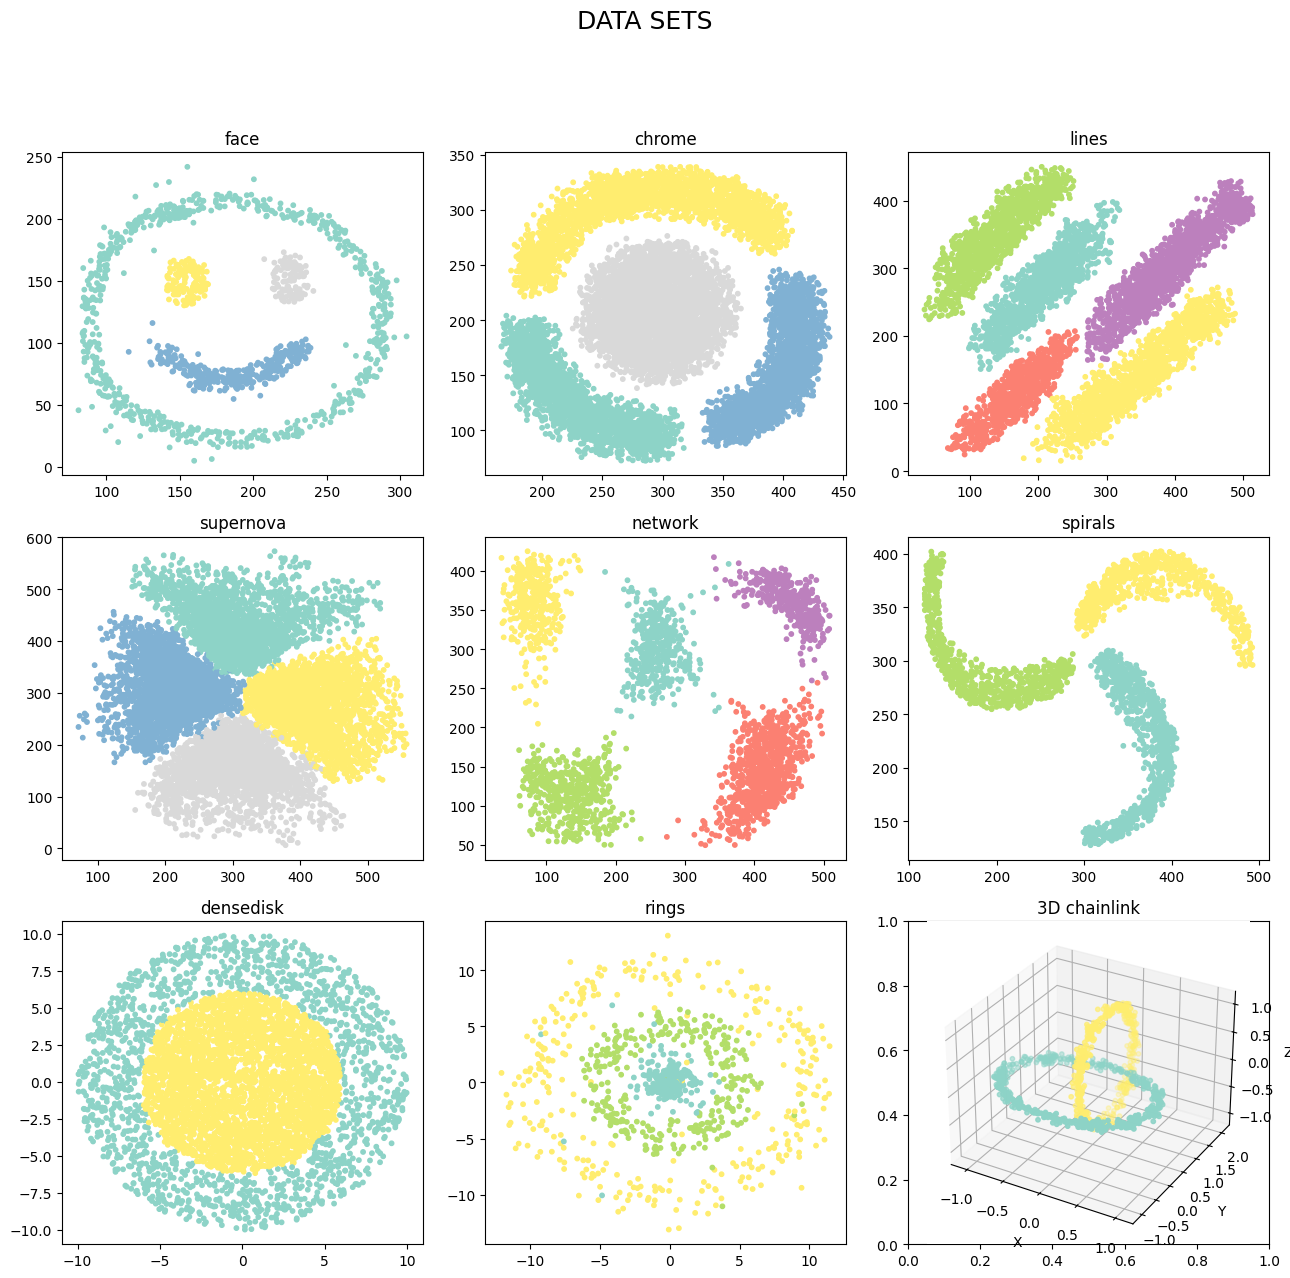

In [708]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 13))
fig.suptitle('DATA SETS\n', size=18)

# Plot the 2D scatterplots
axes[0, 0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap="Set3")
axes[0, 0].set_title("face")

axes[0, 1].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap="Set3")
axes[0, 1].set_title("chrome")

axes[0, 2].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap="Set3")
axes[0, 2].set_title("lines")

axes[1, 0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap="Set3")
axes[1, 0].set_title("supernova")

axes[1, 1].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap="Set3")
axes[1, 1].set_title("network")

axes[1, 2].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap="Set3")
axes[1, 2].set_title("spirals")

axes[2, 0].scatter(densedisk['x'], densedisk['y'], c=densedisk['color'], s=10, cmap="Set3")
axes[2, 0].set_title("densedisk")

axes[2, 1].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap="Set3")
axes[2, 1].set_title("rings")

# Add a 3D plot
ax3d = fig.add_subplot(3, 3, 9, projection='3d')
ax3d.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

## A. Use K-means to cluster each dataset

1. Create each copy of the dataset for k-means

In [709]:
# put your answer here
face_kmeans_df = face_df.copy()
chrome_kmeans_df = chrome_df.copy()
lines2_kmeans_df = lines2_df.copy()
supernova_kmeans_df = supernova_df.copy()
network_kmeans_df = network_df.copy()
spirals_kmeans_df= spirals_df.copy()
densedisk_kmeans_df = densedisk.copy()
rings_kmeans_df = rings_df.copy()
chainlink_kmeans_df = chainlink_df.copy()

2. Drop the "color" column on all datasets

In [710]:
# put your answer here
face_kmeans_df = face_kmeans_df.drop('color', axis=1)
chrome_kmeans_df = chrome_kmeans_df.drop('color', axis=1)
lines2_kmeans_df = lines2_kmeans_df.drop('color', axis=1)
supernova_kmeans_df = supernova_kmeans_df.drop('color', axis=1)
network_kmeans_df = network_kmeans_df.drop('color', axis=1)
spirals_kmeans_df = spirals_kmeans_df.drop('color', axis=1)
densedisk_kmeans_df = densedisk_kmeans_df.drop('color', axis=1)
rings_kmeans_df = rings_kmeans_df.drop('color', axis=1)
chainlink_kmeans_df= chainlink_kmeans_df.drop('color', axis=1)

In [711]:
face_kmeans_df

Unnamed: 0.1           x           y
0             1087  230.378162  141.270406
1              464  281.264318  127.419565
2             1237  157.530566  158.890252
3               68  107.354057  175.958260
4             1151  148.118641  161.809148
...            ...         ...         ...
1268           769  167.555193   70.606537
1269           965  195.410619   66.919043
1270           898  227.116212   96.825663
1271           335  204.010101   29.357968
1272            86   96.093497  171.561675

[1273 rows x 3 columns]

3. Train a K-means model for each dataset.

In [712]:
# put your answer here
face_kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
chrome_kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
lines2_kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
supernova_kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
network_kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
spirals_kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
densedisk_kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
rings_kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
chainlink_kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)

y_face_kmeans = face_kmeans.fit_predict(face_kmeans_df)
y_chrome_kmeans = chrome_kmeans.fit_predict(chrome_kmeans_df)
y_lines2_kmeansns = lines2_kmeans.fit_predict(lines2_kmeans_df)
y_supernova_kmeans = supernova_kmeans.fit_predict(supernova_kmeans_df)
y_network_kmeans = network_kmeans.fit_predict(network_kmeans_df)
y_spirals_kmeans = spirals_kmeans.fit_predict(spirals_kmeans_df)
y_densedisk_kmeans = densedisk_kmeans.fit_predict(densedisk_kmeans_df)
y_rings_kmeans = rings_kmeans.fit_predict(rings_kmeans_df)
y_chainlink_kmeans = chainlink_kmeans.fit_predict(chainlink_kmeans_df)

4. Add a "Cluster" column for each data set

In [713]:
# put your answer here
face_kmeans_df['Cluster'] = y_face_kmeans
chrome_kmeans_df['Cluster'] = y_chrome_kmeans
lines2_kmeans_df['Cluster'] = y_lines2_kmeansns
supernova_kmeans_df['Cluster'] = y_supernova_kmeans
network_kmeans_df['Cluster'] = y_network_kmeans
spirals_kmeans_df['Cluster'] = y_spirals_kmeans
densedisk_kmeans_df['Cluster'] = y_densedisk_kmeans
rings_kmeans_df['Cluster'] = y_rings_kmeans
chainlink_kmeans_df['Cluster'] = y_chainlink_kmeans

5. Plot the Correct cluster and the K-means cluster

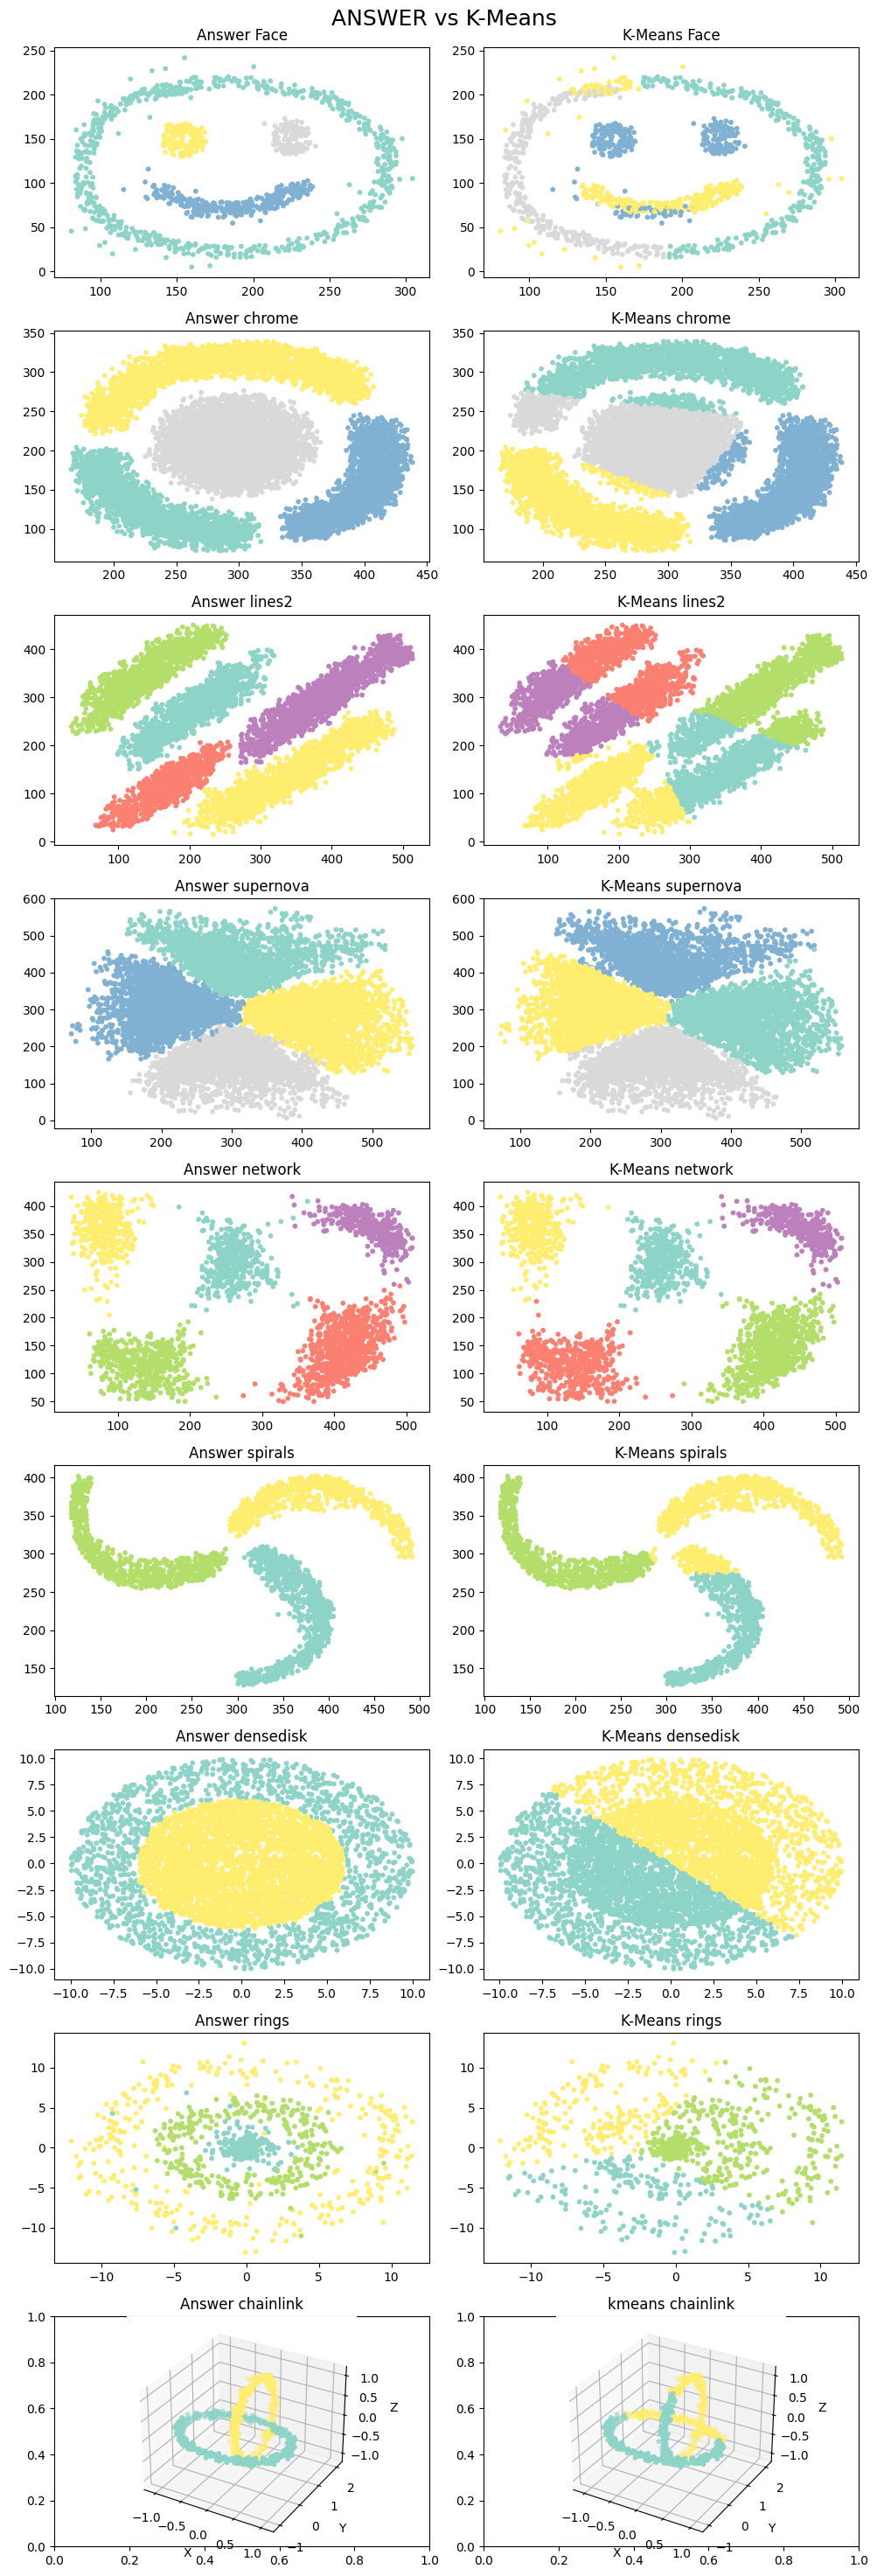

In [714]:
# put your answer here
fig, axes = plt.subplots(nrows=9, ncols=2,figsize=(10,30))
fig.suptitle('ANSWER vs K-Means\n', size = 18)

axes[0,0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap = "Set3")
axes[0,0].set_title("Answer Face");
axes[0,1].scatter(face_kmeans_df['x'], face_kmeans_df['y'], c=face_kmeans_df['Cluster'], s=10, cmap = "Set3")
axes[0,1].set_title("K-Means Face");

axes[1,0].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap = "Set3")
axes[1,0].set_title("Answer chrome");
axes[1,1].scatter(chrome_kmeans_df['x'], chrome_kmeans_df['y'], c=chrome_kmeans_df['Cluster'], s=10, cmap = "Set3")
axes[1,1].set_title("K-Means chrome");

axes[2,0].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap = "Set3")
axes[2,0].set_title("Answer lines2");
axes[2,1].scatter(lines2_kmeans_df['x'], lines2_kmeans_df['y'], c=lines2_kmeans_df['Cluster'], s=10, cmap = "Set3")
axes[2,1].set_title("K-Means lines2");

axes[3,0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap = "Set3")
axes[3,0].set_title("Answer supernova");
axes[3,1].scatter(supernova_kmeans_df['x'], supernova_kmeans_df['y'], c=supernova_kmeans_df['Cluster'], s=10, cmap = "Set3")
axes[3,1].set_title("K-Means supernova");

axes[4,0].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap = "Set3")
axes[4,0].set_title("Answer network");
axes[4,1].scatter(network_kmeans_df['x'], network_kmeans_df['y'], c=network_kmeans_df['Cluster'], s=10, cmap = "Set3")
axes[4,1].set_title("K-Means network");

axes[5,0].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap = "Set3")
axes[5,0].set_title("Answer spirals");
axes[5,1].scatter(spirals_kmeans_df['x'], spirals_kmeans_df['y'], c=spirals_kmeans_df['Cluster'], s=10, cmap = "Set3")
axes[5,1].set_title("K-Means spirals");

axes[6,0].scatter(densedisk['x'], densedisk['y'], c=densedisk['color'], s=10, cmap = "Set3")
axes[6,0].set_title("Answer densedisk");
axes[6,1].scatter(densedisk_kmeans_df['x'], densedisk_kmeans_df['y'], c=densedisk_kmeans_df['Cluster'], s=10, cmap = "Set3")
axes[6,1].set_title("K-Means densedisk");

axes[7,0].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap = "Set3")
axes[7,0].set_title("Answer rings");
axes[7,1].scatter(rings_kmeans_df['x'], rings_kmeans_df['y'], c=rings_kmeans_df['Cluster'], s=10, cmap = "Set3")
axes[7,1].set_title("K-Means rings");



ax3d = fig.add_subplot(9, 2, 17, projection='3d')
ax3d.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d.set_title("Answer chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

ax3d = fig.add_subplot(9, 2, 18, projection='3d')
ax3d.scatter(chainlink_kmeans_df['x'], chainlink_kmeans_df['y'], chainlink_kmeans_df['z'], c=chainlink_kmeans_df['Cluster'], cmap="Set3", s=10)
ax3d.set_title("kmeans chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

plt.tight_layout()

## B. Use Agglomerative Clustering to cluster each dataset

1. Create each copy of the dataset for Agglomerative Clustering

In [715]:
# put your answer here
face_agglo_df = face_df.copy()
chrome_agglo_df = chrome_df.copy()
lines2_agglo_df = lines2_df.copy()
supernova_agglo_df = supernova_df.copy()
network_agglo_df = network_df.copy()
spirals_agglo_df= spirals_df.copy()
densedisk_agglo_df = densedisk.copy()
rings_agglo_df = rings_df.copy()
chainlink_agglo_df = chainlink_df.copy()

2. Drop the "color" column on all datasets

In [716]:
# put your answer here
face_agglo_df = face_agglo_df.drop('color', axis=1)
chrome_agglo_df = chrome_agglo_df.drop('color', axis=1)
lines2_agglo_df = lines2_agglo_df.drop('color', axis=1)
supernova_agglo_df = supernova_agglo_df.drop('color', axis=1)
network_agglo_df = network_agglo_df.drop('color', axis=1)
spirals_agglo_df = spirals_agglo_df.drop('color', axis=1)
densedisk_agglo_df = densedisk_agglo_df.drop('color', axis=1)
rings_agglo_df = rings_agglo_df.drop('color', axis=1)
chainlink_agglo_df= chainlink_agglo_df.drop('color', axis=1)

3. Train a Agglomerative Clustering model for each dataset.

In [717]:
# put your answer here
face_agglo = AgglomerativeClustering(n_clusters = 4, metric='euclidean', linkage = 'ward')
chrome_agglo = AgglomerativeClustering(n_clusters = 4, metric='euclidean', linkage = 'ward')
lines2_agglo = AgglomerativeClustering(n_clusters = 5, metric='euclidean', linkage = 'ward')
supernova_agglo = AgglomerativeClustering(n_clusters = 4, metric='euclidean', linkage = 'ward')
network_agglo = AgglomerativeClustering(n_clusters = 5, metric='euclidean', linkage = 'ward')
spirals_agglo = AgglomerativeClustering(n_clusters = 3, metric='euclidean', linkage = 'ward')
densedisk_agglo = AgglomerativeClustering(n_clusters = 2, metric='euclidean', linkage = 'ward')
rings_agglo = AgglomerativeClustering(n_clusters = 3, metric='euclidean', linkage = 'ward')
chainlink_agglo = AgglomerativeClustering(n_clusters = 2, metric='euclidean', linkage = 'ward')

y_face_agglo = face_agglo.fit_predict(face_agglo_df)
y_chrome_agglo = chrome_agglo.fit_predict(chrome_agglo_df)
y_lines2_agglo = lines2_agglo.fit_predict(lines2_agglo_df)
y_supernova_agglo = supernova_agglo.fit_predict(supernova_agglo_df)
y_network_agglo = network_agglo.fit_predict(network_agglo_df)
y_spirals_agglo = spirals_agglo.fit_predict(spirals_agglo_df)
y_densedisk_agglo = densedisk_agglo.fit_predict(densedisk_agglo_df)
y_rings_agglo = rings_agglo.fit_predict(rings_agglo_df)
y_chainlink_agglo= chainlink_agglo.fit_predict(chainlink_agglo_df)

4. Add a "Cluster" column for each data set

In [718]:
# put your answer here
face_agglo_df['Cluster'] = y_face_agglo
chrome_agglo_df['Cluster'] = y_chrome_agglo
lines2_agglo_df['Cluster'] = y_lines2_agglo
supernova_agglo_df['Cluster'] = y_supernova_agglo
network_agglo_df['Cluster'] = y_network_agglo
spirals_agglo_df['Cluster'] = y_spirals_agglo
densedisk_agglo_df['Cluster'] = y_densedisk_agglo
rings_agglo_df['Cluster'] = y_rings_agglo
chainlink_agglo_df['Cluster'] = y_chainlink_agglo

5. Plot the Correct cluster and the Agglomerative cluster

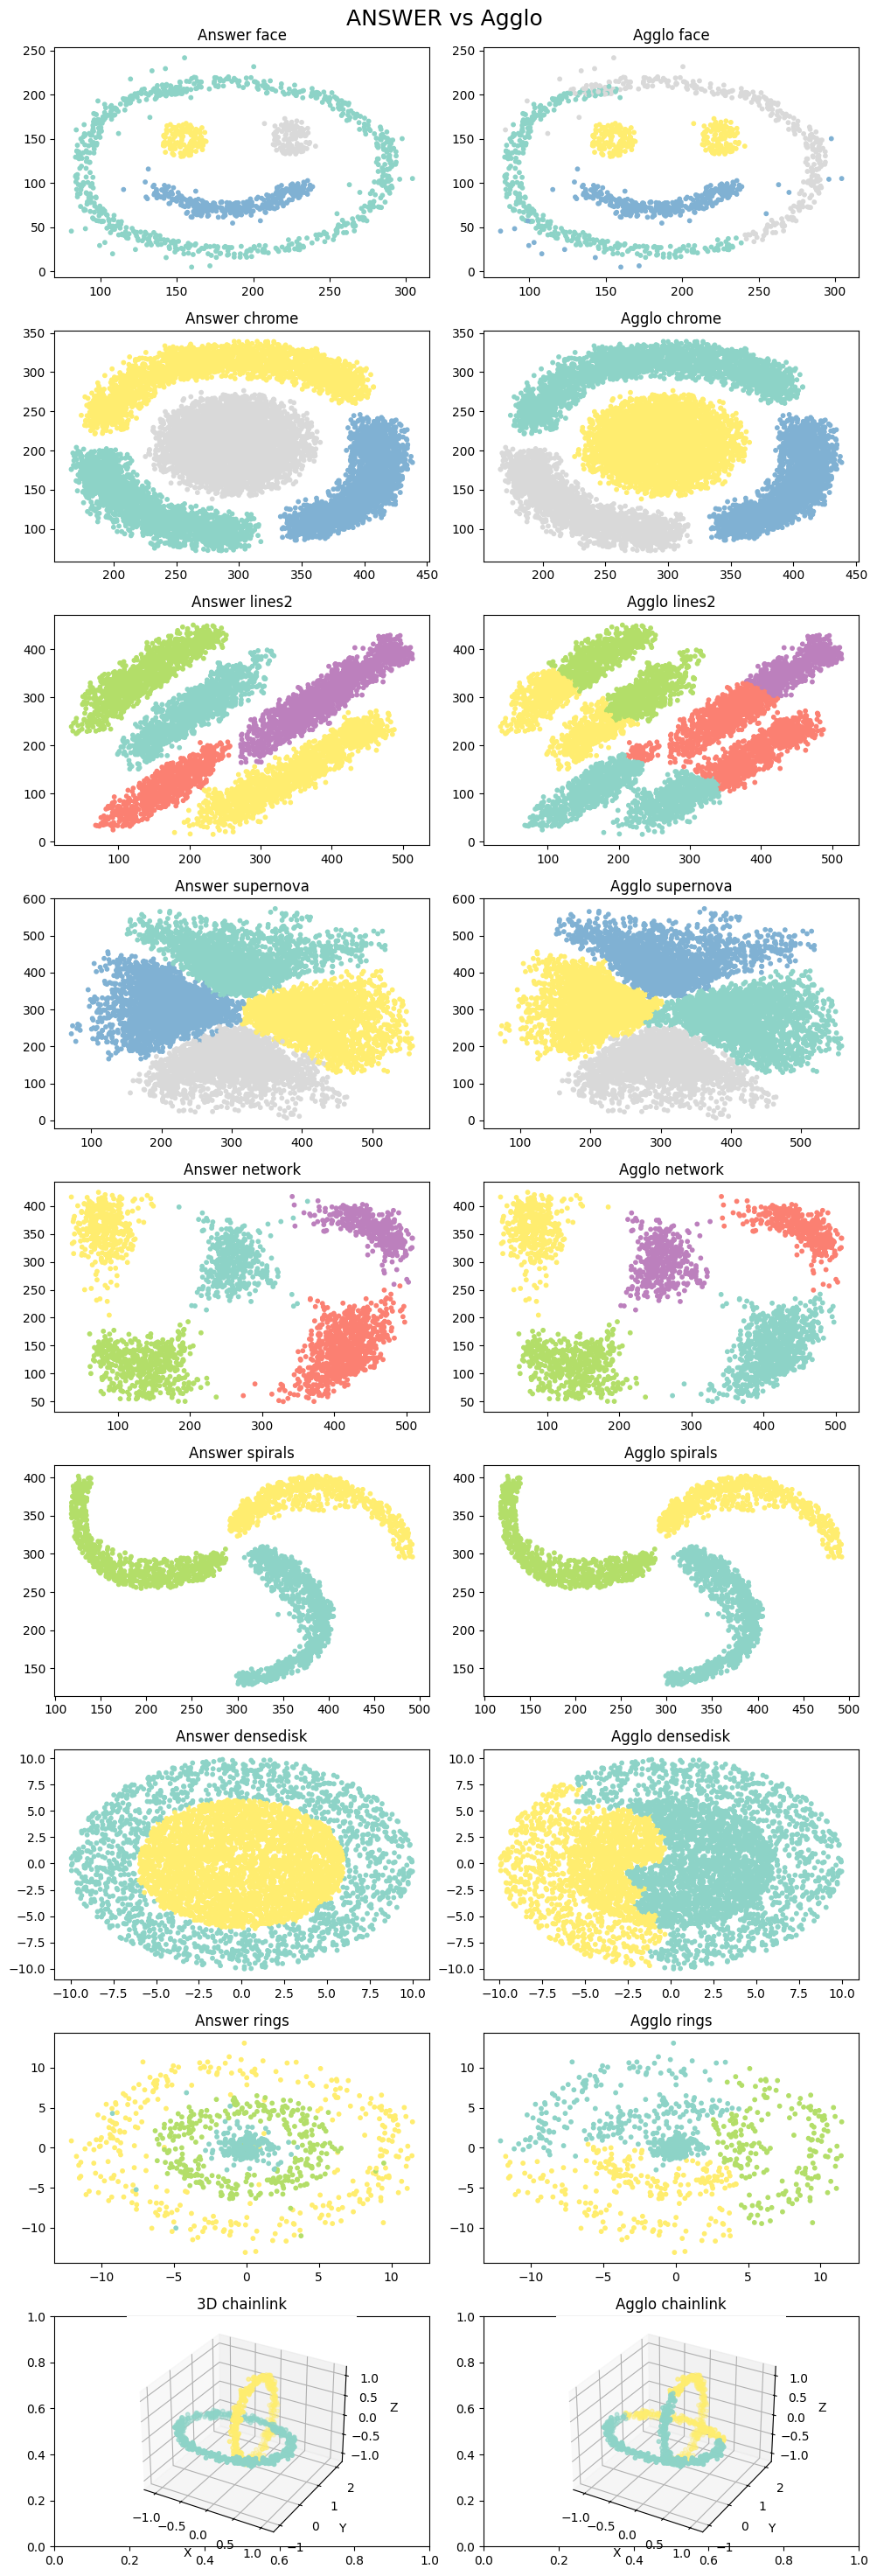

In [719]:
# put your answer here
fig, axes = plt.subplots(nrows=9, ncols=2,figsize=(10,30))
fig.suptitle('ANSWER vs Agglo\n', size = 18)

axes[0,0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap = "Set3")
axes[0,0].set_title("Answer face");
axes[0,1].scatter(face_agglo_df['x'], face_agglo_df['y'], c=face_agglo_df['Cluster'], s=10, cmap = "Set3")
axes[0,1].set_title("Agglo face");

axes[1,0].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap = "Set3")
axes[1,0].set_title("Answer chrome");
axes[1,1].scatter(chrome_agglo_df['x'], chrome_agglo_df['y'], c=chrome_agglo_df['Cluster'], s=10, cmap = "Set3")
axes[1,1].set_title("Agglo chrome");

axes[2,0].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap = "Set3")
axes[2,0].set_title("Answer lines2");
axes[2,1].scatter(lines2_agglo_df['x'], lines2_agglo_df['y'], c=lines2_agglo_df['Cluster'], s=10, cmap = "Set3")
axes[2,1].set_title("Agglo lines2");

axes[3,0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap = "Set3")
axes[3,0].set_title("Answer supernova");
axes[3,1].scatter(supernova_agglo_df['x'], supernova_agglo_df['y'], c=supernova_agglo_df['Cluster'], s=10, cmap = "Set3")
axes[3,1].set_title("Agglo supernova");

axes[4,0].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap = "Set3")
axes[4,0].set_title("Answer network");
axes[4,1].scatter(network_agglo_df['x'], network_agglo_df['y'], c=network_agglo_df['Cluster'], s=10, cmap = "Set3")
axes[4,1].set_title("Agglo network");

axes[5,0].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap = "Set3")
axes[5,0].set_title("Answer spirals");
axes[5,1].scatter(spirals_agglo_df['x'], spirals_agglo_df['y'], c=spirals_agglo_df['Cluster'], s=10, cmap = "Set3")
axes[5,1].set_title("Agglo spirals");

axes[6,0].scatter(densedisk['x'], densedisk['y'], c=densedisk['color'], s=10, cmap = "Set3")
axes[6,0].set_title("Answer densedisk");
axes[6,1].scatter(densedisk_agglo_df['x'], densedisk_agglo_df['y'], c=densedisk_agglo_df['Cluster'], s=10, cmap = "Set3")
axes[6,1].set_title("Agglo densedisk");

axes[7,0].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap = "Set3")
axes[7,0].set_title("Answer rings");
axes[7,1].scatter(rings_agglo_df['x'], rings_agglo_df['y'], c=rings_agglo_df['Cluster'], s=10, cmap = "Set3")
axes[7,1].set_title("Agglo rings");



ax3d = fig.add_subplot(9, 2, 17, projection='3d')
ax3d.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

ax3d = fig.add_subplot(9, 2, 18, projection='3d')
ax3d.scatter(chainlink_agglo_df['x'], chainlink_agglo_df['y'], chainlink_agglo_df['z'], c=chainlink_kmeans_df['Cluster'], cmap="Set3", s=10)
ax3d.set_title("Agglo chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

plt.tight_layout()

## C. Use DBSCAN to cluster each dataset

1. Create each copy of the dataset for Agglomerative Clustering

In [720]:
# put your answer here
face_scan_df = face_df.copy()
chrome_scan_df = chrome_df.copy()
lines2_scan_df = lines2_df.copy()
supernova_scan_df = supernova_df.copy()
network_scan_df = network_df.copy()
spirals_scan_df= spirals_df.copy()
densedisk_scan_df = densedisk.copy()
rings_scan_df = rings_df.copy()
chainlink_scan_df = chainlink_df.copy()

2. Drop the "color" column on all datasets

In [721]:
# put your answer here
# put your answer here
face_scan_df = face_scan_df.drop('color', axis=1)
chrome_scan_df = chrome_scan_df.drop('color', axis=1)
lines2_scan_df = lines2_scan_df.drop('color', axis=1)
supernova_scan_df = supernova_scan_df.drop('color', axis=1)
network_scan_df = network_scan_df.drop('color', axis=1)
spirals_scan_df = spirals_scan_df.drop('color', axis=1)
densedisk_scan_df = densedisk_scan_df.drop('color', axis=1)
rings_scan_df = rings_scan_df.drop('color', axis=1)
chainlink_scan_df= chainlink_scan_df.drop('color', axis=1)

3. Train a DBSCAN Clustering model for each dataset.

In [722]:
# put your answer here
face_scan = DBSCAN(eps=39, min_samples=50, metric='euclidean')
chrome_scan = DBSCAN(eps=13, min_samples=45, metric='euclidean')
lines2_scan = DBSCAN(eps=17, min_samples=20, metric='euclidean')
supernova_scan = DBSCAN(eps=13, min_samples=45, metric='euclidean')
network_scan = DBSCAN(eps=20, min_samples=4, metric='euclidean')
spirals_scan = DBSCAN(eps=15, min_samples=5, metric='euclidean')
densedisk_scan = DBSCAN(eps=1, min_samples=45, metric='euclidean')
rings_scan = DBSCAN(eps=13, min_samples=45, metric='euclidean')
chainlink_scan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')

y_face_scan = face_scan.fit_predict(face_scan_df)
y_chrome_scan = chrome_scan.fit_predict(chrome_scan_df)
y_lines2_scan = lines2_scan.fit_predict(lines2_scan_df)
y_supernova_scan = supernova_scan.fit_predict(supernova_scan_df)
y_network_scan = network_scan.fit_predict(network_scan_df)
y_spirals_scan = spirals_scan.fit_predict(spirals_scan_df)
y_densedisk_scan = densedisk_scan.fit_predict(densedisk_scan_df)
y_rings_scan = rings_scan.fit_predict(rings_scan_df)
y_chainlink_scan = chainlink_scan.fit_predict(chainlink_scan_df)

face_scan_df['Cluster'] = y_face_scan
chrome_scan_df['Cluster'] = y_chrome_scan
lines2_scan_df['Cluster'] = y_lines2_scan
supernova_scan_df['Cluster'] = y_supernova_scan
network_scan_df['Cluster'] = y_network_scan
spirals_scan_df['Cluster'] = y_spirals_scan
densedisk_scan_df['Cluster'] = y_densedisk_scan
rings_scan_df['Cluster'] = y_rings_scan
chainlink_scan_df['Cluster'] = y_chainlink_scan

4. Add a "Cluster" column for each data set

In [723]:
# put your answer here
# put your answer here


5. Plot the Correct cluster and the DBSCAN cluster

In [724]:
# put your answer here
fig, axes = plt.subplots(nrows=9, ncols=2,figsize=(10,30))
fig.suptitle('ANSWER vs K-Means\n', size = 18)

axes[0,0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap = "Set3")
axes[0,0].set_title("Answer Face");
axes[0,1].scatter(face_scan_df['x'], face_scan_df['y'], c=face_scan_df['Cluster'], s=10, cmap = "Set3")
axes[0,1].set_title("K-Means Face");

axes[1,0].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap = "Set3")
axes[1,0].set_title("Answer chrome");
axes[1,1].scatter(chrome_scan_df['x'], chrome_scan_df['y'], c=chrome_scan_df['Cluster'], s=10, cmap = "Set3")
axes[1,1].set_title("K-Means chrome");

axes[2,0].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap = "Set3")
axes[2,0].set_title("Answer lines2");
axes[2,1].scatter(lines2_scan_df['x'], lines2_scan_df['y'], c=lines2_scan_df['Cluster'], s=10, cmap = "Set3")
axes[2,1].set_title("K-Means lines2");

axes[3,0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap = "Set3")
axes[3,0].set_title("Answer supernova");
axes[3,1].scatter(supernova_scan_df['x'], supernova_scan_df['y'], c=supernova_scan_df['Cluster'], s=10, cmap = "Set3")
axes[3,1].set_title("K-Means supernova");

axes[4,0].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap = "Set3")
axes[4,0].set_title("Answer network");
axes[4,1].scatter(network_scan_df['x'], network_scan_df['y'], c=network_scan_df['Cluster'], s=10, cmap = "Set3")
axes[4,1].set_title("K-Means network");

axes[5,0].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap = "Set3")
axes[5,0].set_title("Answer spirals");
axes[5,1].scatter(spirals_scan_df['x'], spirals_scan_df['y'], c=spirals_scan_df['Cluster'], s=10, cmap = "Set3")
axes[5,1].set_title("K-Means spirals");

axes[6,0].scatter(densedisk['x'], densedisk['y'], c=densedisk['color'], s=10, cmap = "Set3")
axes[6,0].set_title("Answer densedisk");
axes[6,1].scatter(densedisk_scan_df['x'], densedisk_scan_df['y'], c=densedisk_scan_df['Cluster'], s=10, cmap = "Set3")
axes[6,1].set_title("K-Means densedisk");

axes[7,0].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap = "Set3")
axes[7,0].set_title("Answer rings");
axes[7,1].scatter(rings_scan_df['x'], rings_scan_df['y'], c=rings_scan_df['Cluster'], s=10, cmap = "Set3")
axes[7,1].set_title("K-Means rings");



ax3d = fig.add_subplot(9, 2, 17, projection='3d')
ax3d.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d.set_title("Answer chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

ax3d = fig.add_subplot(9, 2, 18, projection='3d')
ax3d.scatter(chainlink_scan_df['x'], chainlink_scan_df['y'], chainlink_scan_df['z'], c=chainlink_scan_df['Cluster'], cmap="Set3", s=10)
ax3d.set_title("kmeans chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

plt.tight_layout()

## D. Compare all algorithms

1. Display the Correct cluster, K-means cluster, Agglomerative cluster and DBSCAN cluster in a single plot.

- Each row should contain each dataset
- Each column should contain each the correct cluster, k-means cluster, agglomerative cluster and DBSCAN cluster.

In [725]:
# put your answer here
# put your answer here
fig, axes = plt.subplots(nrows=9, ncols=4,figsize=(10,30))
fig.suptitle('ANSWER vs K-Means\n', size = 36)

axes[0,0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap = "Set3")
axes[0,0].set_title("Answer Face");
axes[0,1].scatter(face_kmeans_df['x'], face_kmeans_df['y'], c=face_kmeans_df['Cluster'], s=10, cmap = "Set3")
axes[0,1].set_title("K-Means Face");
axes[0,2].scatter(face_agglo_df['x'], face_agglo_df['y'], c=face_agglo_df['Cluster'], s=10, cmap = "Set3")
axes[0,2].set_title("Agglo face");
axes[0,3].scatter(face_scan_df['x'], face_scan_df['y'], c=face_scan_df['Cluster'], s=10, cmap = "Set3")
axes[0,3].set_title("DBSCAN Face");

axes[1,0].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap = "Set3")
axes[1,0].set_title("Answer chrome");
axes[1,1].scatter(chrome_kmeans_df['x'], chrome_kmeans_df['y'], c=chrome_kmeans_df['Cluster'], s=10, cmap = "Set3")
axes[1,1].set_title("K-Means chrome");
axes[1,2].scatter(chrome_agglo_df['x'], chrome_agglo_df['y'], c=chrome_agglo_df['Cluster'], s=10, cmap = "Set3")
axes[1,2].set_title("Agglo chrome");
axes[1,3].scatter(chrome_scan_df['x'], chrome_scan_df['y'], c=chrome_scan_df['Cluster'], s=10, cmap = "Set3")
axes[1,3].set_title("DBSCAN chrome");

axes[2,0].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap = "Set3")
axes[2,0].set_title("Answer lines2");
axes[2,1].scatter(lines2_kmeans_df['x'], lines2_kmeans_df['y'], c=lines2_kmeans_df['Cluster'], s=10, cmap = "Set3")
axes[2,1].set_title("K-Means lines2");
axes[2,2].scatter(lines2_agglo_df['x'], lines2_agglo_df['y'], c=lines2_agglo_df['Cluster'], s=10, cmap = "Set3")
axes[2,2].set_title("Agglo lines2");
axes[2,3].scatter(lines2_scan_df['x'], lines2_scan_df['y'], c=lines2_scan_df['Cluster'], s=10, cmap = "Set3")
axes[2,3].set_title("DBSCAN lines2");

axes[3,0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap = "Set3")
axes[3,0].set_title("Answer supernova");
axes[3,1].scatter(supernova_kmeans_df['x'], supernova_kmeans_df['y'], c=supernova_kmeans_df['Cluster'], s=10, cmap = "Set3")
axes[3,1].set_title("K-Means supernova");
axes[3,2].scatter(supernova_agglo_df['x'], supernova_agglo_df['y'], c=supernova_agglo_df['Cluster'], s=10, cmap = "Set3")
axes[3,2].set_title("Agglo supernova");
axes[3,3].scatter(supernova_scan_df['x'], supernova_scan_df['y'], c=supernova_scan_df['Cluster'], s=10, cmap = "Set3")
axes[3,3].set_title("DBSCAN supernova");

axes[4,0].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap = "Set3")
axes[4,0].set_title("Answer network");
axes[4,1].scatter(network_kmeans_df['x'], network_kmeans_df['y'], c=network_kmeans_df['Cluster'], s=10, cmap = "Set3")
axes[4,1].set_title("K-Means network");
axes[4,2].scatter(network_agglo_df['x'], network_agglo_df['y'], c=network_agglo_df['Cluster'], s=10, cmap = "Set3")
axes[4,2].set_title("Agglo network");
axes[4,3].scatter(network_scan_df['x'], network_scan_df['y'], c=network_scan_df['Cluster'], s=10, cmap = "Set3")
axes[4,3].set_title("DBSCAN network");

axes[5,0].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap = "Set3")
axes[5,0].set_title("Answer spirals");
axes[5,1].scatter(spirals_kmeans_df['x'], spirals_kmeans_df['y'], c=spirals_kmeans_df['Cluster'], s=10, cmap = "Set3")
axes[5,1].set_title("K-Means spirals");
axes[5,2].scatter(spirals_agglo_df['x'], spirals_agglo_df['y'], c=spirals_agglo_df['Cluster'], s=10, cmap = "Set3")
axes[5,2].set_title("Agglo spirals");
axes[5,3].scatter(spirals_scan_df['x'], spirals_scan_df['y'], c=spirals_scan_df['Cluster'], s=10, cmap = "Set3")
axes[5,3].set_title("DBSCAN spirals");

axes[6,0].scatter(densedisk['x'], densedisk['y'], c=densedisk['color'], s=10, cmap = "Set3")
axes[6,0].set_title("Answer densedisk");
axes[6,1].scatter(densedisk_kmeans_df['x'], densedisk_kmeans_df['y'], c=densedisk_kmeans_df['Cluster'], s=10, cmap = "Set3")
axes[6,1].set_title("K-Means densedisk");
axes[6,2].scatter(densedisk_agglo_df['x'], densedisk_agglo_df['y'], c=densedisk_agglo_df['Cluster'], s=10, cmap = "Set3")
axes[6,2].set_title("Agglo densedisk");
axes[6,3].scatter(densedisk_scan_df['x'], densedisk_scan_df['y'], c=densedisk_scan_df['Cluster'], s=10, cmap = "Set3")
axes[6,3].set_title("DBSCAN densedisk");

axes[7,0].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap = "Set3")
axes[7,0].set_title("Answer rings");
axes[7,1].scatter(rings_kmeans_df['x'], rings_kmeans_df['y'], c=rings_kmeans_df['Cluster'], s=10, cmap = "Set3")
axes[7,1].set_title("K-Means rings");
axes[7,2].scatter(rings_agglo_df['x'], rings_agglo_df['y'], c=rings_agglo_df['Cluster'], s=10, cmap = "Set3")
axes[7,2].set_title("Agglo rings");
axes[7,3].scatter(rings_scan_df['x'], rings_scan_df['y'], c=rings_scan_df['Cluster'], s=10, cmap = "Set3")
axes[7,3].set_title("DBSCAN rings");



ax3d = fig.add_subplot(9, 4, 33, projection='3d')
ax3d.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d.set_title("Answer chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

ax3d = fig.add_subplot(9, 4, 34, projection='3d')
ax3d.scatter(chainlink_kmeans_df['x'], chainlink_kmeans_df['y'], chainlink_kmeans_df['z'], c=chainlink_kmeans_df['Cluster'], cmap="Set3", s=10)
ax3d.set_title("kmeans chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

ax3d = fig.add_subplot(9, 4, 35, projection='3d')
ax3d.scatter(chainlink_agglo_df['x'], chainlink_agglo_df['y'], chainlink_agglo_df['z'], c=chainlink_kmeans_df['Cluster'], cmap="Set3", s=10)
ax3d.set_title("Agglo chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

ax3d = fig.add_subplot(9, 4, 36, projection='3d')
ax3d.scatter(chainlink_scan_df['x'], chainlink_scan_df['y'], chainlink_scan_df['z'], c=chainlink_scan_df['Cluster'], cmap="Set3", s=10)
ax3d.set_title("DBSCAN chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

plt.tight_layout()